In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn
import statsmodels.api as sm

In [30]:
csv = pd.read_csv('book_data.csv')

In [31]:
# Retirando todas as variáveis que não serão utilizadas por enquanto
csv.drop(['book_isbn','book_desc','book_edition','book_rating_count','image_url'],axis=1,inplace=True)
# Retirando os livros com informações faltando
csv=csv.dropna()
csv.head()

,book_authors,book_format,book_pages,book_rating,book_review_count,book_title,genres
0,Suzanne Collins,Hardcover,374 pages,4.33,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,J.K. Rowling|Mary GrandPré,Paperback,870 pages,4.48,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction
2,Harper Lee,Paperback,324 pages,4.27,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,Paperback,279 pages,4.25,54322,Pride and Prejudice,Classics|Fiction|Romance
4,Stephenie Meyer,Paperback,498 pages,3.58,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...


In [32]:
lista = ['muito ruim ou não avaliado', 'ruim', 'médio', 'bom', 'muito bom']
avaliacoes = []

for i in csv['book_rating'].values:
    if i>=0 and i<2.5:
        avaliacoes.append(lista[0])
    elif i>=2.5 and i<3.5:
        avaliacoes.append(lista[1])
    elif i>=3.5 and i<4:
        avaliacoes.append(lista[2])
    elif i>=4  and i<4.35:
        avaliacoes.append(lista[3])
    elif i>=4.35 and i<=5:
        avaliacoes.append(lista[4])

In [33]:
j = pd.Series(avaliacoes)
j = j.value_counts()
j.values

array([20531, 20437,  5056,  2226,    10])

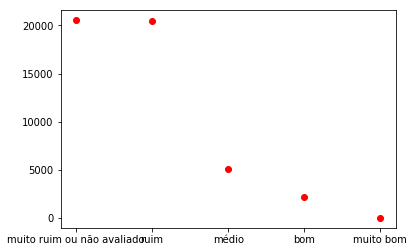

In [34]:
plt.plot(lista,j.values ,'ro')

In [35]:
avaliacoes_ = pd.DataFrame({'avaliações':avaliacoes}, index = csv.index)
csv = csv.join(avaliacoes_,how='inner')
csv.drop(['book_rating'],axis=1, inplace=True)

In [36]:
csv.head()

,book_authors,book_format,book_pages,book_review_count,book_title,genres,avaliações
0,Suzanne Collins,Hardcover,374 pages,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,bom
1,J.K. Rowling|Mary GrandPré,Paperback,870 pages,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,muito bom
2,Harper Lee,Paperback,324 pages,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,bom
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,Paperback,279 pages,54322,Pride and Prejudice,Classics|Fiction|Romance,bom
4,Stephenie Meyer,Paperback,498 pages,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,médio


In [37]:
def limpando(csv):
    # Ajeitando as variáveis
    ar = csv['genres'].tolist()
    ar1 = []
    iniciais = []
    paginas = []

    # Escolhendo como gênero literário apenas o primeiro listado.
    for i in ar:
        if i == "":
            ar1.append("")
        else:
            a = i.split('|')
            ar1.append(a[0])

    # Selecionando apenas a inicial dos nomes dos autores
    for i in csv['book_authors']:
        iniciais.append(i[0])

    # Apenas o número de páginas aparecerá, sem a palavra "pages"
    for i in csv['book_pages']:
        numero = i.split(' ')
        paginas.append(int(numero[0]))
    return ar1,paginas,iniciais
ar1,paginas,iniciais = limpando(csv)
print(ar1[0:10],paginas[0:10],iniciais[0:10])

['Young Adult', 'Fantasy', 'Classics', 'Classics', 'Young Adult', 'Historical', 'Fantasy', 'Classics', 'Classics', 'Fantasy'] [374, 870, 324, 279, 498, 552, 767, 122, 1037, 1728] ['S', 'J', 'H', 'J', 'S', 'M', 'C', 'G', 'M', 'J']


In [38]:
# Criando colunas no DataFrame para as iniciais dos autores, os números de páginas e o principal gênero do livro
ar1=pd.DataFrame({'genero':ar1},index = csv.index)
iniciais_ = pd.DataFrame({'iniciais':iniciais}, index = csv.index)
paginas_ = pd.DataFrame({'paginas':paginas}, index = csv.index)

In [39]:
csv = csv.join(ar1,how='inner')
csv = csv.join(iniciais_,how='inner')
csv = csv.join(paginas_,how='inner')

In [40]:
csv.drop(['book_authors','book_pages','book_title','genres'],axis=1,inplace=True)

In [41]:
csv.head(10)

,book_format,book_review_count,avaliações,genero,iniciais,paginas
0,Hardcover,160706,bom,Young Adult,S,374
1,Paperback,33264,muito bom,Fantasy,J,870
2,Paperback,79450,bom,Classics,H,324
3,Paperback,54322,bom,Classics,J,279
4,Paperback,97991,médio,Young Adult,S,498
5,Hardcover,100821,muito bom,Historical,M,552
6,Paperback,9439,bom,Fantasy,C,767
7,Paperback,42156,médio,Classics,G,122
8,Paperback,17452,bom,Classics,M,1037
9,Mass Market Paperback,1652,muito bom,Fantasy,J,1728


In [45]:
y=csv.avaliações
num = csv[['paginas','book_review_count']]
qual = csv[['book_format', 'genero', 'iniciais']]

In [47]:
encoder = OneHotEncoder()
capa_encoded = encoder.fit_transform(qual)
x_num = num.values
x_encoded = capa_encoded.toarray()
X = np.concatenate((x_num,x_encoded), axis=1)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5375051802735185
